# 🏋️‍♂️ Customer Segmentation in a Gym: Unsupervised Learning Approach

## **Introduction**
Understanding customer behavior is essential for business success. In this project, we use **unsupervised learning** techniques to segment gym members based on their purchasing and usage patterns.  

### **Objective**
The goal is to group customers into clusters to help the gym optimize services, marketing, and resource allocation.

### **Dataset Description**
We use the **Wholesale Customers Data Set** from the UCI Machine Learning Repository, which contains:  
- **Annual spending** on different product categories.  
- **Customer segmentation attributes** based on purchase behavior.  
- **No predefined labels**, making it ideal for clustering.  

### **Why Clustering?**
Since we have no predefined labels, **clustering algorithms** (K-Means, DBSCAN, and Spectral Clustering) will help us find natural customer groups.  

We will follow a structured pipeline:

1️⃣ **Understanding the Data**  
2️⃣ **Exploratory Data Analysis (EDA)**  
3️⃣ **Preprocessing for Clustering**  
4️⃣ **Selecting the Best Number of Clusters**  
5️⃣ **Training Different Clustering Models**  
6️⃣ **Evaluating and Visualizing Results**  
7️⃣ **Saving the Final Model**  

At the end, we will store the trained model for future use. 🚀

# 📂 Step 1: Importing Libraries and Setup  
We import all necessary libraries and configure the environment to ensure the notebook runs correctly.  

In [1]:
import sys
import os
import importlib

sys.path.insert(0,'../utils')

import pandas as pd
import numpy as np
from eda import load_data, explore_data
from data_preprocessing import preprocess_data_dbscan, preprocess_data_kmeans, reduce_dimensionality, preprocess_data_spectral
from model import evaluate_model, apply_spectral_clustering, find_optimal_clusters, find_best_k, apply_kmeans, evaluate_clustering, save_model, find_optimal_eps, apply_dbscan
from visualization import visualize_clusters_kmeans, visualize_clusters_dbscan, plot_cluster_distribution, plot_clusters_kmeans, plot_clusters_spectral

In [2]:
df = load_data('../data_sample/gym_members_exercise_tracking.csv')

# 📊 Step 2: Data Loading and Exploration  
Before training the model, it is crucial to understand the structure of the data.  

We perform:  
✅ Inspection of the first few rows  
✅ General information about variables  
✅ Statistical analysis of numerical values  

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/w

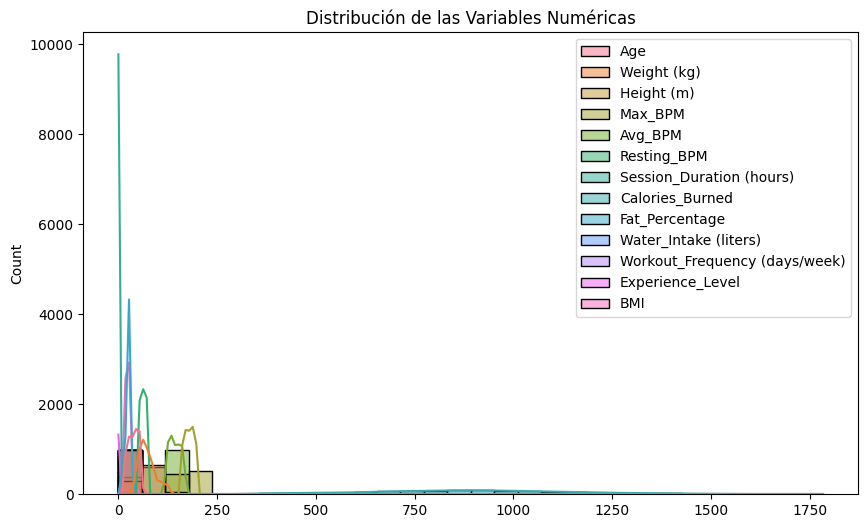

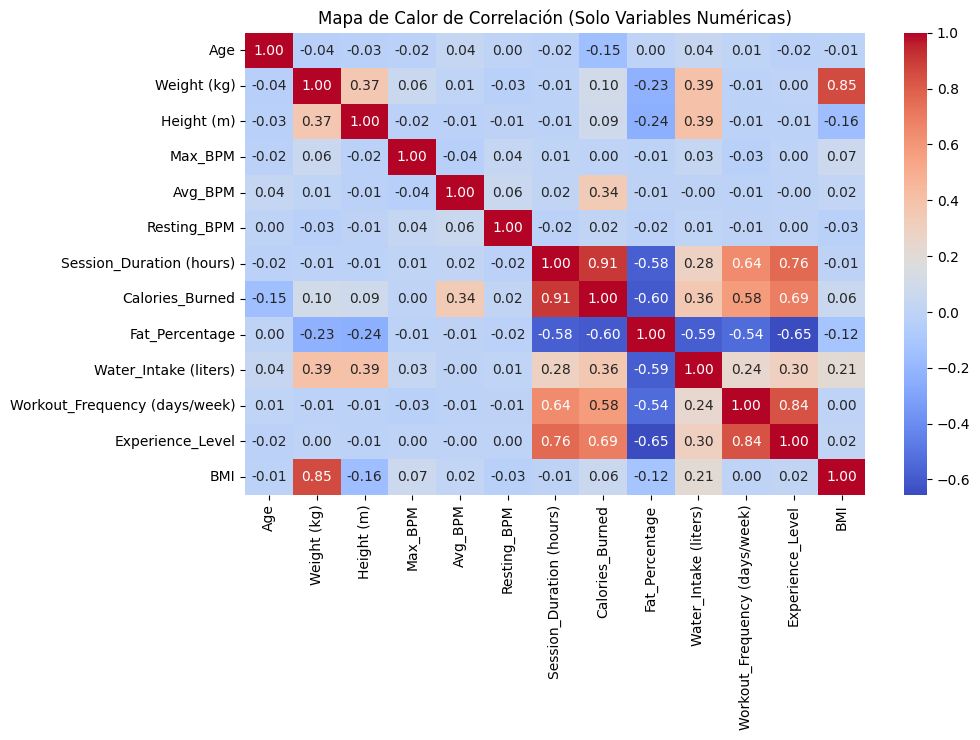

In [4]:
explore_data(df)

# 🛠 Step 3: Data Preprocessing  

## **Why Different Preprocessing for Each Model?**  
Each clustering algorithm has different mathematical properties and assumptions, so the preprocessing steps vary:

- **K-Means:** Requires scaled numerical data for optimal performance.  
- **DBSCAN:** Works better without scaling and is sensitive to noise.  
- **Spectral Clustering:** Benefits from **dimensionality reduction** before clustering.  

We will now preprocess the data accordingly.

# ⚙️ Step 3.1: Preprocessing for K-Means  
K-Means requires well-scaled data and reduced dimensionality for better performance. We apply:  

📌 **Standardization** → Ensures all features have mean = 0 and variance = 1  
📌 **PCA** → Reduces dimensions while retaining variance  
📌 **Handling outliers** → Reducing the impact of extreme values  


In [5]:
# K-Means
df_processed_kmenas = preprocess_data_kmeans(df)

# 🔍 Step 4.1: Selecting the Optimal Number of Clusters (K-Means)  
To determine the best number of clusters for K-Means, we use:  

📌 **Silhouette Score** → Evaluates cluster cohesion and separation  
📌 **Elbow Method** → Helps visualize the optimal number of clusters  
📌 **Evaluation plot** → Displays the cluster behavior  

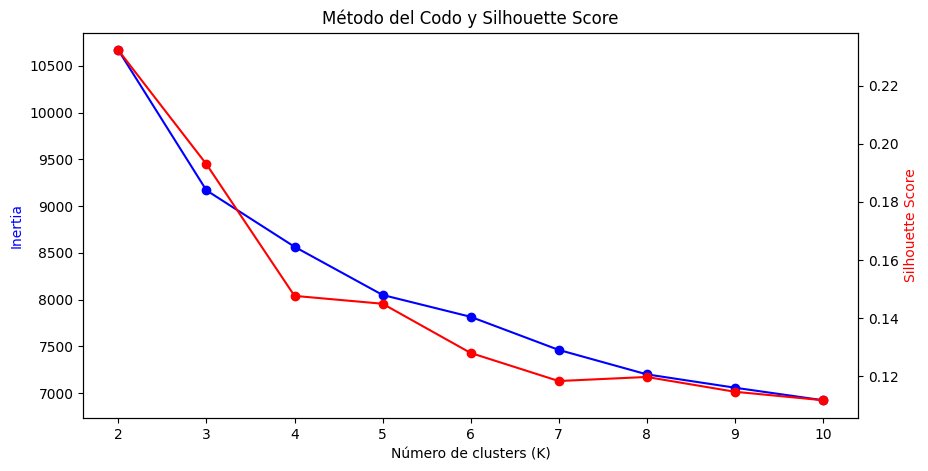

In [6]:
find_optimal_clusters(df_processed_kmenas, k_range=range(2, 11))

# 🤖 Step 5.1: Training the K-Means Model  
We apply K-Means clustering with the optimal number of clusters obtained in the previous step.  

🔹 **Algorithm**: K-Means  
🔹 **Key parameters**: Number of clusters and initialization method


In [7]:
n_clusters = 4
model_kmeans = apply_kmeans(df_processed_kmenas, n_clusters)
labels = model_kmeans

# 📈 Step 6.1: K-Means Cluster Visualization  
We visualize the clusters formed by K-Means using PCA-reduced dimensions.

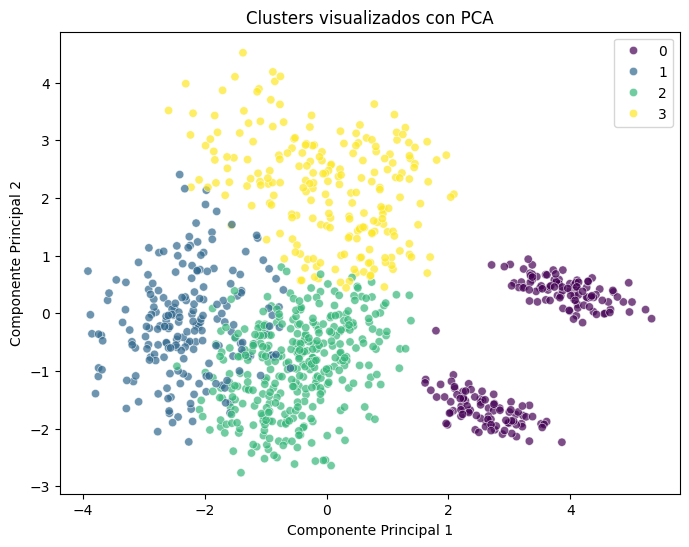

In [8]:
visualize_clusters_kmeans(df_processed_kmenas, labels)

# 📊 Step 7.1: K-Means Model Evaluation  
We evaluate the clustering quality using **Silhouette Score** to determine how well-defined the clusters are.  

✅ **Interpretation**: A high score means distinct clusters, while a low score suggests poor separation.  


In [9]:
evaluate_clustering(df_processed_kmenas, labels)

Silhouette Score: 0.1476
Davies-Bouldin Score: 2.1614
Calinski-Harabasz Score: 183.5502


# ⚙️ Step 3.2: Preprocessing for DBSCAN  
DBSCAN is sensitive to distance-based metrics, so we apply:  

📌 **Feature scaling** → Uses StandardScaler for balanced weight distribution 
📌 **Dimensionality reduction (optional)** → Helps reduce noise for better clustering  


In [10]:
df_dbscan, df_scaled = preprocess_data_dbscan(df)
df_pca = reduce_dimensionality(df_scaled)

# 🔍 Step 4.2: DBSCAN - Finding Optimal Parameters, Training & Evaluation  

Unlike K-Means, DBSCAN does not require specifying the number of clusters. Instead, we determine two key parameters:  
📌 **Epsilon (ε):** Defines the neighborhood radius for cluster formation.  
📌 **Min Samples:** Minimum points required to form a dense region.  

### **Finding Optimal ε**  
We use the **k-distance graph** to determine an appropriate ε value.  

### **Training DBSCAN Model**  
Once the parameters are set, we train DBSCAN to identify customer clusters.  

### **Model Evaluation**  
Since DBSCAN doesn’t assume spherical clusters, we assess its quality using:  
✅ **Silhouette Score** to measure cluster cohesion.  
✅ **Visualizations** to analyze the distribution of clusters.  

In [11]:
eps_range = np.arange(0.1, 2.0, 0.1)
min_samples_range = range(2, 10)

best_eps, best_min_samples, model_dbscan = apply_dbscan(df_pca, eps_range, min_samples_range)

df_dbscan['Cluster'] = model_dbscan

Mejor eps: 0.6, Mejor min_samples: 2, Mejor Silhouette Score: 0.42350428805563334


# 📈 Step 5.2: DBSCAN Cluster Visualization  
We visualize the clusters and noise points identified by DBSCAN.  


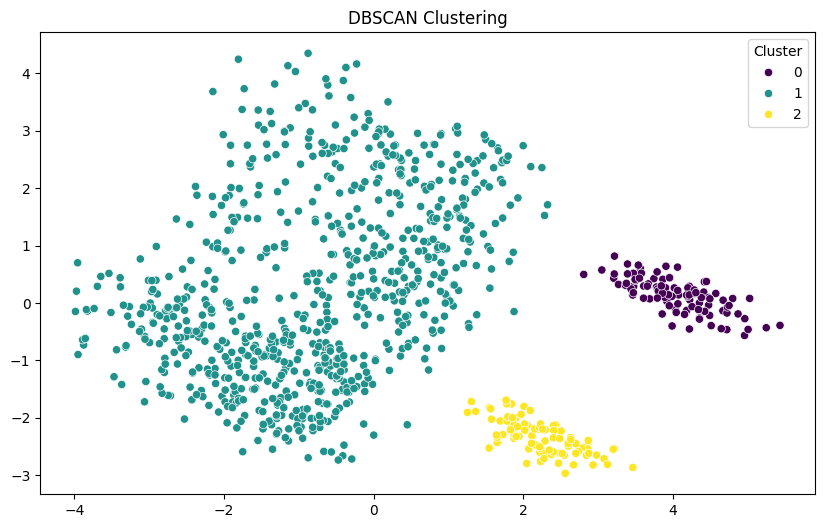

In [12]:
visualize_clusters_dbscan(df_pca, df_dbscan['Cluster'])


# ⚙️ Step 3.3: Preprocessing for Spectral Clustering  
Spectral Clustering is based on graph theory, so it benefits from:  

📌 **Affinity matrix computation** → Determines similarities between points  
📌 **Feature scaling** → Uses StandardScaler for balanced weight distribution  
📌 **Dimensionality reduction** → Helps improve computational efficiency  

In [13]:
df_scaled = preprocess_data_spectral(df)
df_pca = reduce_dimensionality(df_scaled, n_components=2)

# 🔍 Step 4.3: Selecting the Optimal Number of Clusters (Spectral Clustering)  
For Spectral Clustering, we again determine the best number of clusters using:  

📌 **Silhouette Score** → Measures cluster separation  
📌 **Evaluation plot** → Helps decide the optimal cluster count  

c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_sp

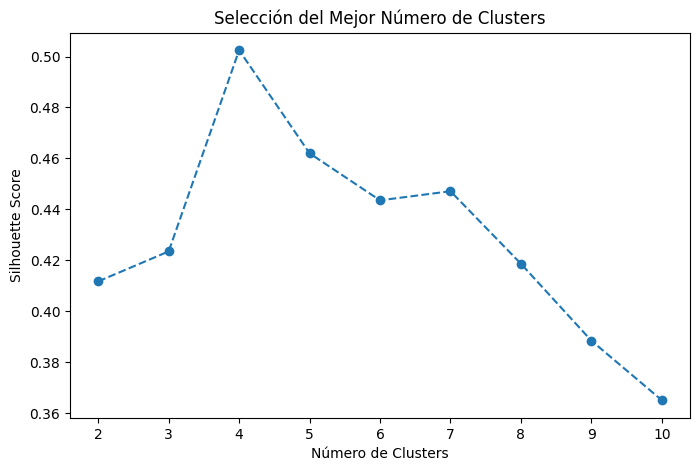

Mejor número de clusters: 4


In [14]:
# Selección del mejor número de clusters
best_k = find_best_k(df_pca)

# 🤖 Step 5.3: Training the Spectral Clustering Model  
We apply Spectral Clustering with the best number of clusters found.  

🔹 **Algorithm**: Spectral Clustering  
🔹 **Key parameters**: Number of clusters, affinity matrix, and eigen decomposition  

In [15]:
model_spectral = apply_spectral_clustering(df_pca, best_k)


c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


# 📈 Step 6.3: Spectral Clustering Visualization  
We plot the clusters obtained from Spectral Clustering using PCA-reduced dimensions. 

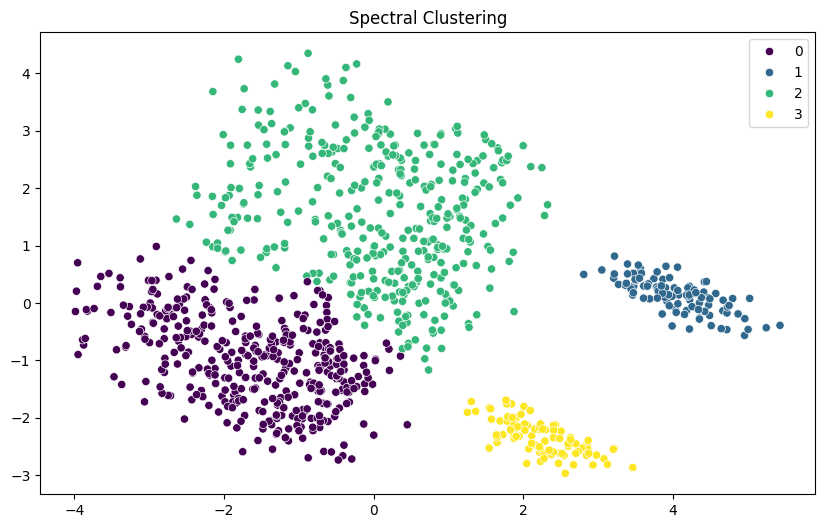

In [16]:
plot_clusters_spectral(df_pca, model_spectral)


# 📊 Step 7.3: Spectral Clustering Model Evaluation  
We assess clustering quality using **Silhouette Score**.  

✅ **Interpretation**: A high score means well-separated clusters, while a low score suggests poor segmentation.  


In [17]:
evaluate_model(df_pca, model_spectral)

Valor final del Silhouette Score: 0.5024690966873062


0.5024690966873062

# 💾 Step 8: Saving the Best Model  
Once all models have been evaluated, we save the best-performing model in the `/src/models/` directory using **pickle** or **joblib** for future use.  

In [19]:
# Guardar el modelo
save_model(model_kmeans, '../models/kmeans_model.pkl')
save_model(model_dbscan, '../models/dbscan_model.pkl')
save_model(model_spectral, '../models/spectral_model.pkl')

print("Modelos guardados exitosamente.")


Modelo guardado como ../models/kmeans_model.pkl
Modelo guardado como ../models/dbscan_model.pkl
Modelo guardado como ../models/spectral_model.pkl
Modelos guardados exitosamente.


# 🎯 Step 9: Conclusions  

## **Key Insights**  
After applying **three clustering algorithms**, we observed:  
✅ **K-Means** performed well with compact and distinct clusters.  
✅ **DBSCAN** detected noise and outliers but required fine-tuning of ε.  
✅ **Spectral Clustering** produced more flexible partitions but was computationally expensive.

## **Business Implications**  
- The gym can **personalize promotions** based on cluster profiles.  
- **Resource allocation** can be optimized for different customer segments.  
- Outlier detection (from DBSCAN) helps identify **unique customer behaviors**.  
